                                            HOMEWORK - 1

Write a Python script that calculates approximations of an image using Singular Value Decomposition. The input image is available at 
https://drive.google.com/file/d/1lMLd2ZLkC-CAL7_pzZjXa-dEbwLTQzcU/view?usp=sharing
You may use library functions to read images from the file and calculate Singular Value Decomposition. 

1)	The image should be read in greyscale (see e.g. https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.imread.html)
2)	For singular value decomposition, see https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
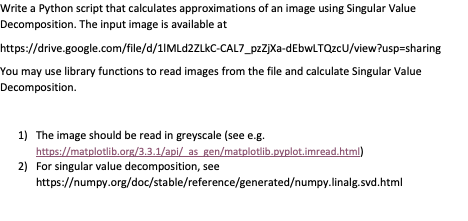

Solution



Calculating approximation of an image using Singular Value Decomposition:
    
    1.Given image is https://drive.google.com/file/d/1lMLd2ZLkC-CAL7_pzZjXa-dEbwLTQzcU/view?usp=sharing
    2.Using library function matplotlib.image we read the image as shown in below code.
    

[[212 211 211 ... 229 229 229]
 [212 211 211 ... 229 229 229]
 [212 211 211 ... 229 229 229]
 ...
 [193 193 193 ... 111 111 111]
 [193 193 193 ... 111 111 111]
 [192 193 194 ... 112 112 112]]


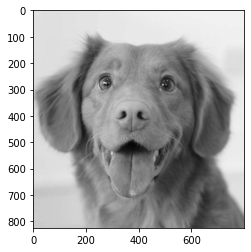

In [158]:
#importing required packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#reading an image using matplotlib.image.imread
img_array = mpimg.imread('image4.jpg')
print(img_array)

#converting the image from RGB to grayscale
img = plt.imshow(img_array, cmap='gray')

Matrix decomposition also known as matrix factorization, involves describing a given matrix using its constituent elements.But the most known and widely used matrix decomposition method is the Singular-Value Decomposition (SVD). All matrices have an SVD, which makes it more stable than other methods, such as the eigendecomposition.It is often used in a wide range of applications including compressing and data reduction.

Singular-Value Decomposition: Matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. SVD is used both in calculation of other matrix operations such as matrix inverse, and also as a data reduction method in machine learning. SVD can also be used in least squares linear regression, image compression, and denoising data.
                                A = U sigma V^T
                   Where A is the real m x n matrix that we have to decompose
                         U is an m x m orthogonal matrix
                         Sigma is an m x n diagonal matrix 
                         V^T is the transpose of an n x n orthogonal matrix

The diagonal values in the Sigma matrix are known as the singular values of the original matrix A. The columns of the U matrix are called the left-singular vectors of A, and the columns of V are called the right-singular vectors of A.
As U and V are orthogonal i.e., U^T U = V V^T = I, where I is the identity matrix. Only the diagonals of the identity matrix are 1, with all other values being 0.

With reference to this link: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html we calculate singular values using numpy.linalg.svd

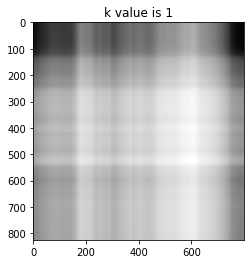

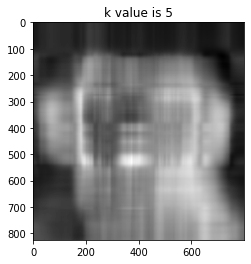

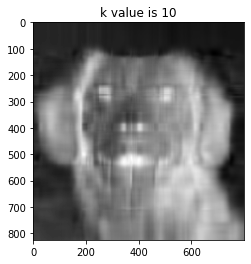

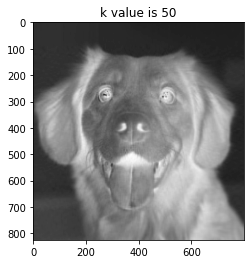

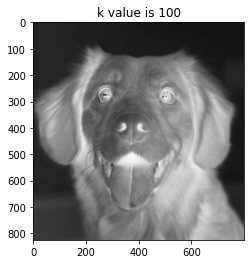

In [161]:
u, s, vt = numpy.linalg.svd(img_array, full_matrices=False)
#extracting diagonal singular values of s matrix 
diagonal_s = np.diag(s)

#given k singular values as 1,5,10,50,100 
k=[1,5,10,50,100]
plot=0

for r in k:
    #constructing approximations using given k values at r 
    #r columns of u 
    #r*r block of diagonal matrix
    #r rows of vt
    approximation = u[:,:r] @ diagonal_s[0:r,:r] @ vt[:r,:]
    plt.figure(plot+1)
    plot=plot+1
    img=plt.imshow(256-approximation)
    img.set_cmap('gray')
    plt.title('k value is '+str(r))
    plt.show()

Above fig1 shows the results of the reconstruction image using 1 singular value, fig2 shows the results using 5 values, fig3 shows the results using 10 values and so on. 
From the observations, we found when k = 1 ≤ 20, the images are blurry and  with the  increase  of singular  values we have a better approach to the original image. 

Below are the observations from the obtained result:
1.Using less singular value (smaller K), the better compression is seen.
2.However, the more singular value is used (larger K), better image quality is obtained and the reconstructed images are more equal to the original.